In [1]:
# import data



import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

pathname1 = "/Users/paulinenicolas/Documents/M2_Data_Science/ML_From_Theory_To_Practice/Project_ML/challenge_training_input_file_predict_the_aesthetic_score_of_a_portrait_by_combining_photo_analysis_and_facial_attributes_analysis/facial_features_train.csv"
pathname2 = "/Users/paulinenicolas/Documents/M2_Data_Science/ML_From_Theory_To_Practice/Project_ML/challenge_output_data_training_file_predict_the_aesthetic_score_of_a_portrait_by_combining_photo_analysis_and_facial_attributes_analysis.csv"
#pathname1 = "/Users/estelleaflalo/Desktop/M2_Data_Science/First_Period/Machine_Learning_from_Theory_to_Practice/Project/challenge_fichier_dentrees_dentrainement_predire_le_score_esthetique_dun_portrait/facial_features_train.csv"
#pathname2 = "/Users/estelleaflalo/Desktop/M2_Data_Science/First_Period/Machine_Learning_from_Theory_to_Practice/Project/challenge_fichier_de_sortie_dentrainement_predire_le_score_esthetique_dun_portrait.csv"

df = pd.read_csv(pathname1, sep = ',')
df_score = pd.read_csv(pathname2, sep = ';')

In [2]:
df.head()

,ID,detection score,x0,y0,width,height,left_eye_x,left_eye_y,right_eye_x,right_eye_y,...,angle_impact_p,angle_impact_n,position_impact_p,position_impact_n,sharpness_impact_p,sharpness_impact_n,exposure_impact_p,exposure_impact_n,expression impact_p,expression_impact_n
0,1,0.989140,0.286370,0.194149,0.586600,0.437185,0.352257,0.342082,0.528909,0.334524,...,0.500000,0.000000,0.000000,0.000000,0.666667,0.0,0.166667,0.000000,0.166667,0.000000
1,2,0.999978,0.622779,0.104573,0.319961,0.479114,0.721203,0.248519,0.859511,0.250956,...,0.000000,0.000000,0.428571,-0.142857,0.857143,0.0,0.285714,0.000000,0.714286,0.000000
2,3,0.999749,0.141922,0.224155,0.418156,0.549069,0.278366,0.419830,0.445683,0.364625,...,0.166667,0.000000,0.333333,0.000000,1.000000,0.0,0.333333,-0.166667,0.333333,0.000000
3,4,0.999806,0.499818,0.382715,0.485564,0.551305,0.656774,0.516767,0.847100,0.584977,...,0.166667,-0.166667,0.166667,-0.333333,1.000000,0.0,0.166667,0.000000,0.166667,0.000000
4,5,0.996076,0.275462,0.301032,0.440068,0.315859,0.383386,0.393272,0.560128,0.401940,...,0.000000,-0.166667,0.000000,0.000000,0.500000,0.0,0.333333,0.000000,0.333333,-0.166667


In [3]:
df_score.head()

,ID,TARGET
0,1,13
1,2,18
2,3,19
3,4,11
4,5,13


# Data Visualizations

Let's look at the distribution of scoring

In [4]:
df_score['TARGET'].describe()

count    10000.000000
mean        12.413600
std          4.427922
min          0.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         24.000000
Name: TARGET, dtype: float64

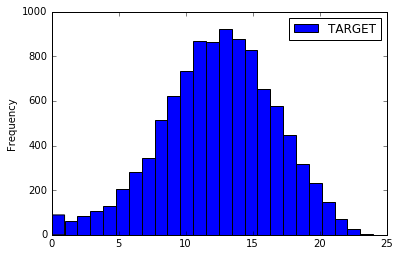

In [5]:
df_score.set_index('ID').plot.hist(df_score.set_index('ID'), bins = 25)

{'boxes': [<matplotlib.lines.Line2D at 0x1152d8f98>],
 'caps': [<matplotlib.lines.Line2D at 0x1152e69e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1152ecbe0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1152ec3c8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1152e1978>,
  <matplotlib.lines.Line2D at 0x1152e1b00>]}

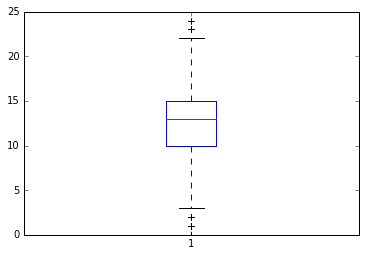

In [6]:
plt.boxplot(df_score['TARGET'])

We can note that it is a Gaussian distribution with a mean of 12.4 and standard deviation of 4.4.


/Users/paulinenicolas/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


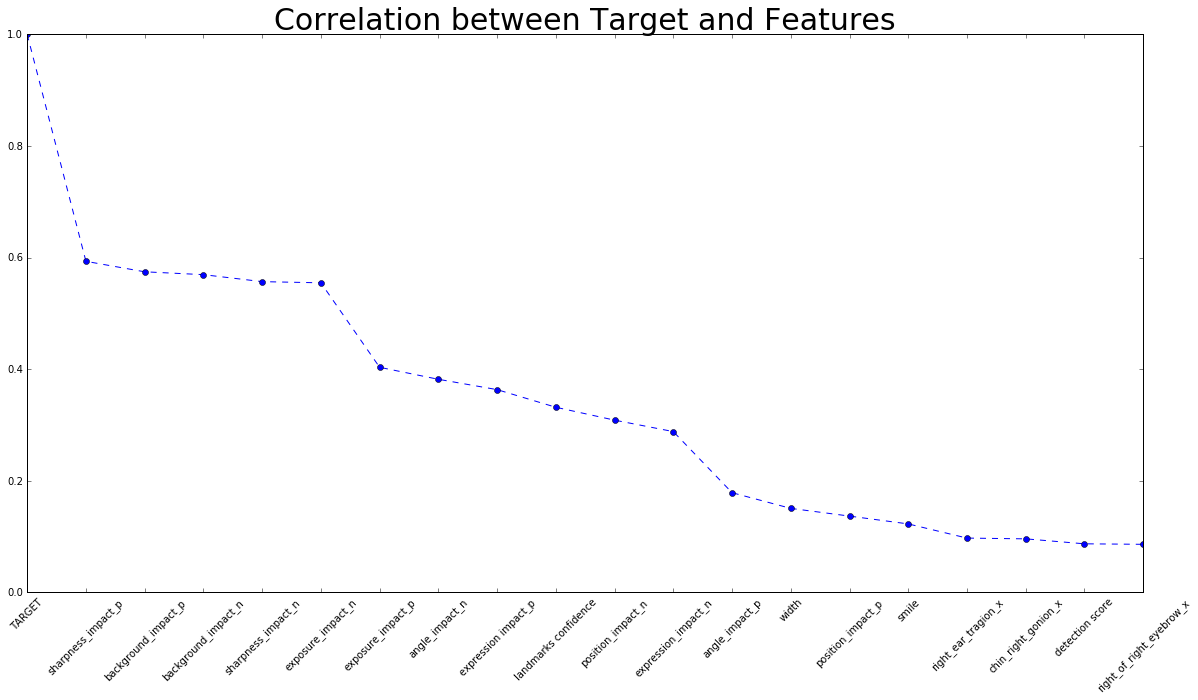

In [7]:
merge_feat_score = df.merge(df_score, how='left', left_on = 'ID',  right_on = 'ID')
correlation = merge_feat_score.corr()

corr_target = correlation.sort(['TARGET'], ascending = False)['TARGET']
x = range(len(corr_target.tolist()[:20]))
y = corr_target.tolist()[:20]
my_xticks = corr_target.index.tolist()[:20]
plt.figure(figsize=(20,10))
plt.xticks(x, my_xticks,rotation=45)
plt.plot(x, y, linestyle='--', marker='o')
plt.title('Correlation between Target and Features',fontsize=30)
plt.show()


We can notice that the attributes "impact" are very corrolated to the score. That justify the first subproblem.

In [100]:
#my_xticks[:10]
corr_target.index.tolist()

['TARGET',
 'sharpness_impact_p',
 'background_impact_p',
 'background_impact_n',
 'sharpness_impact_n',
 'exposure_impact_n',
 'exposure_impact_p',
 'angle_impact_n',
 'expression impact_p',
 'landmarks confidence',
 'position_impact_n',
 'expression_impact_n',
 'angle_impact_p',
 'width',
 'position_impact_p',
 'smile',
 'right_ear_tragion_x',
 'chin_right_gonion_x',
 'detection score',
 'right_of_right_eyebrow_x',
 'height',
 'right_eye_right_corner_x',
 'right_eye_bottom_boundary_x',
 'right_eyebrow_upper_midpoint_x',
 'right_eye_pupil_x',
 'right_eye_x',
 'mouth_right_x',
 'right_eye_top_boundary_x',
 'chin_gnathion_y',
 'lower_lip_y',
 'mouth_center_y',
 'upper_lip_y',
 'mouth_left_y',
 'nose_bottom_center_y',
 'nose_bottom_left_y',
 'chin_left_gonion_y',
 'mouth_right_y',
 'nose_bottom_right_x',
 'nose_bottom_right_y',
 'right_eye_left_corner_x',
 'nose_tip_y',
 'chin_right_gonion_y',
 'left_of_right_eyebrow_x',
 'left_ear_tragion_y',
 'left_eye_right_corner_y',
 'left_eye_botto

In [93]:
df_10_first_corr= df[['sharpness_impact_p',
 'background_impact_p',
 'background_impact_n',
 'sharpness_impact_n',
 'exposure_impact_n',
 'exposure_impact_p',
 'angle_impact_n',
 'expression impact_p',
 'landmarks confidence']]

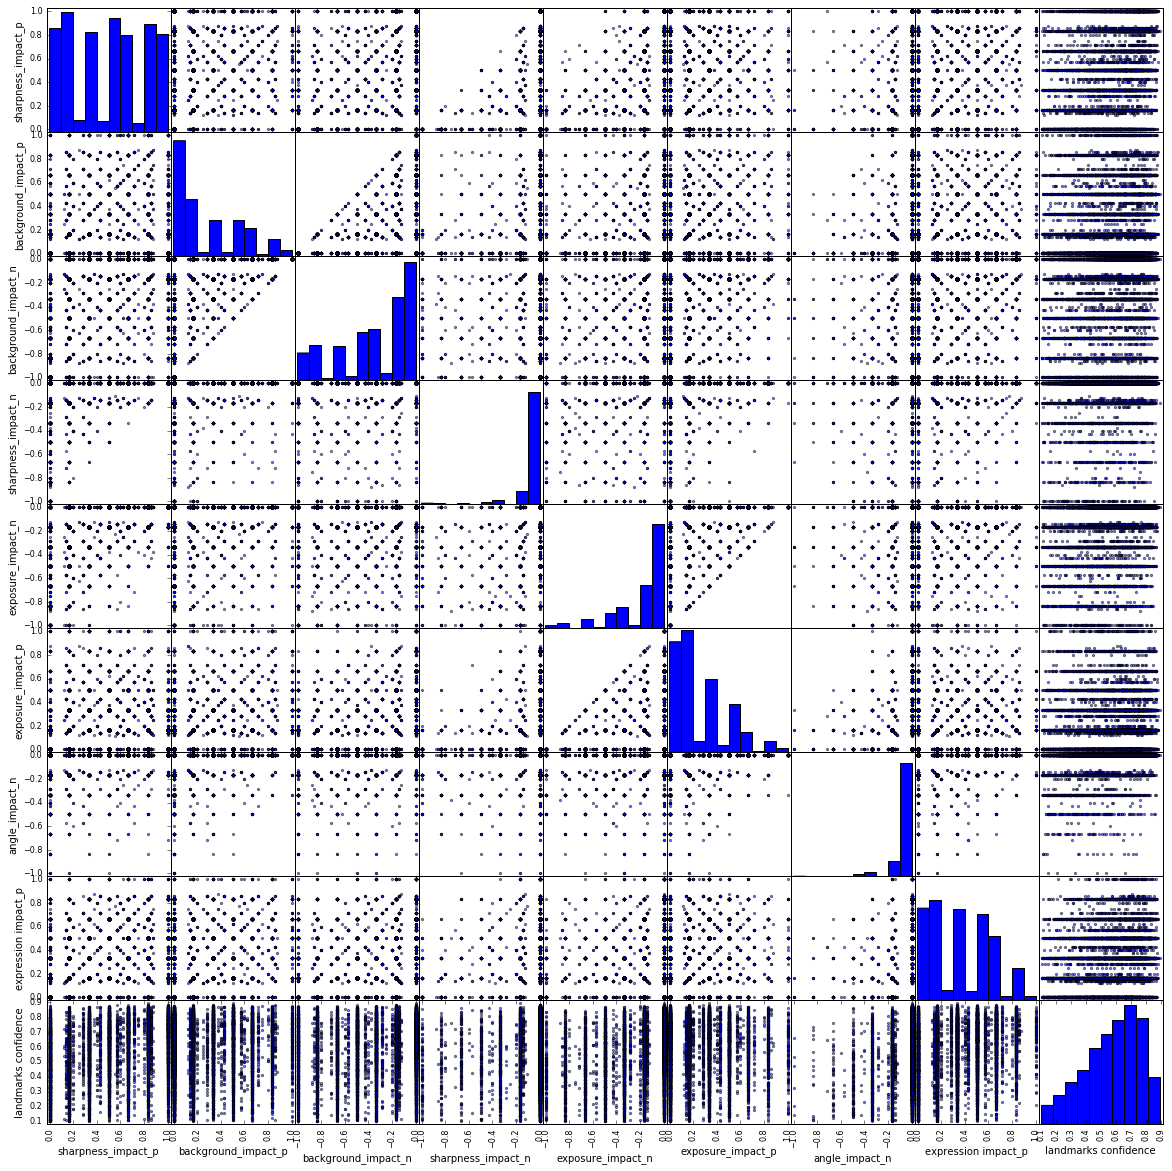

In [98]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(df_10_first_corr,figsize=[20,20])
plt.show()

We can see here that the attributes the more corrolated to the score are not corrolated together. It means that we will have to take them all.

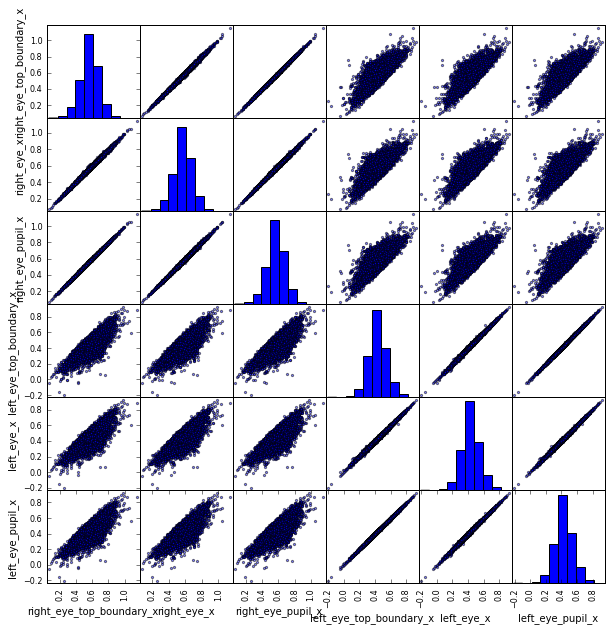

In [113]:
test=df[['right_eye_top_boundary_x',
 'right_eye_x',
 'right_eye_pupil_x',
         
 'left_eye_top_boundary_x',
 'left_eye_x',
 'left_eye_pupil_x']]
scatter_matrix(test,figsize=[10,10])
plt.show()

However, we can see that for instance all the attributes related to "eye" are very corrolated one to the other. 

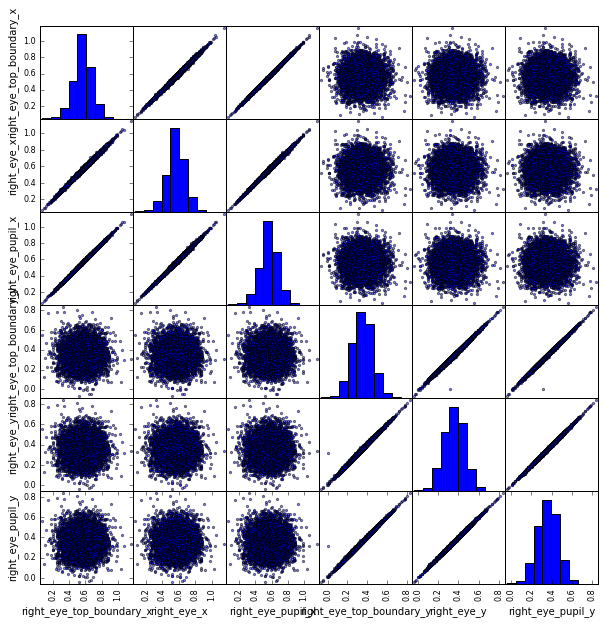

In [112]:
test=df[['right_eye_top_boundary_x',
 'right_eye_x',
 'right_eye_pupil_x',
         
 'right_eye_top_boundary_y',
 'right_eye_y',
 'right_eye_pupil_y']]
scatter_matrix(test,figsize=[10,10])
plt.show()

The last matrix shows that for a same attribute such as "righ_eye", x axis and y axis are not corrolated at all. It means that the pictures are not centered

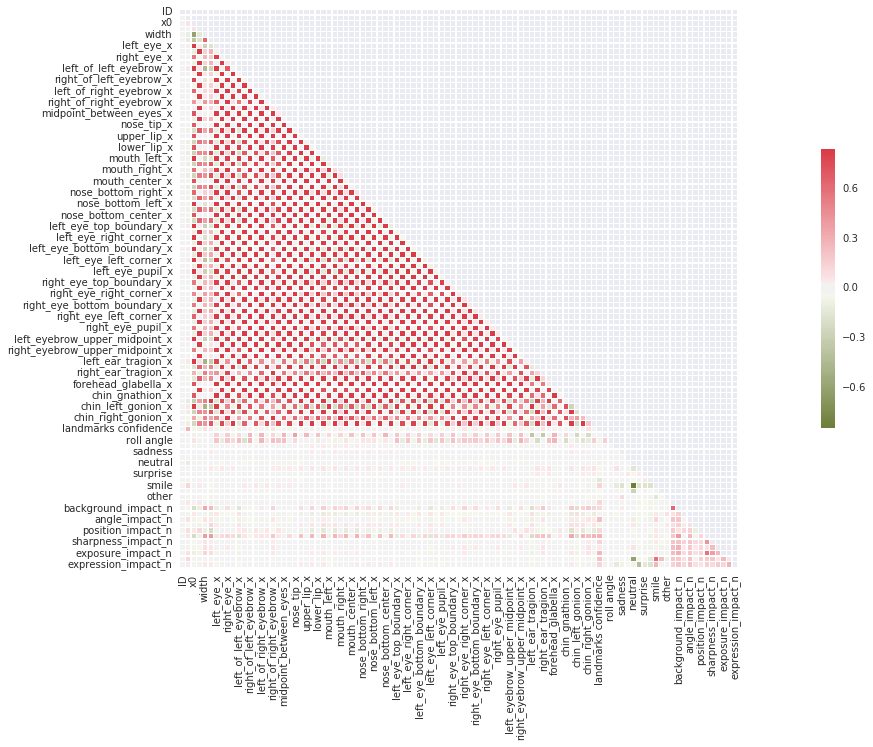

In [140]:
import seaborn as sns

# Generate a mask for the upper triangle
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(100, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.3, cbar_kws={"shrink": .5}, ax=ax)

Finally, the matrix above shows that a lot of features are corrolated together and a PCA seems to be essential. The impact attributes seems not to be corrolated with the others : it means that we will have to perform an algorithm on the pictures themselves to find these. 

Assumption : maybe we won't need the position attributes at all?

In [143]:
df[['width','height']]

,width,height
0,0.586600,0.437185
1,0.319961,0.479114
2,0.418156,0.549069
3,0.485564,0.551305
4,0.440068,0.315859
5,0.210481,0.293664
6,0.495595,0.328318
7,0.341615,0.252417
8,0.180619,0.270474
9,0.462837,0.345120
